<a href="https://colab.research.google.com/github/Anish32/Banking-Analysis/blob/main/Mall_Customers_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
up = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Mall_Customers.csv')
df1 = df.copy()

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
df.drop('CustomerID',axis=1,inplace=True) # Remove inplace=True

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object') --- Index(['Gender'], dtype='object')


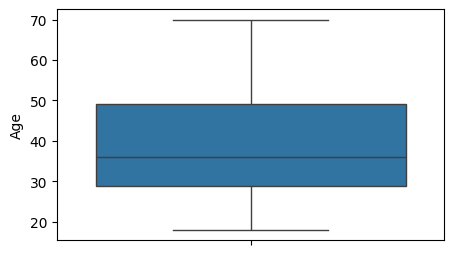

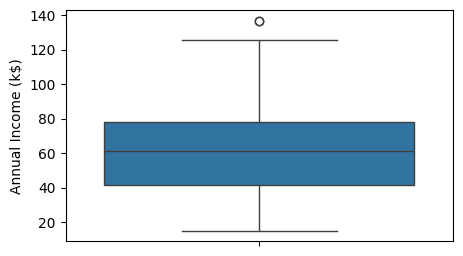

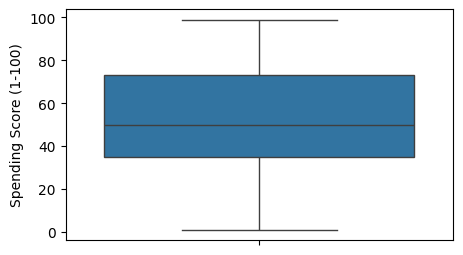

In [11]:
numerical_features = df.select_dtypes(include=[np.number]).columns
categorical_features = df.select_dtypes(exclude=[np.number]).columns
print(numerical_features,'---', categorical_features)
for i in numerical_features:
  plt.figure(figsize=[5,3])
  sns.boxplot(df[i])
  plt.show()
print()

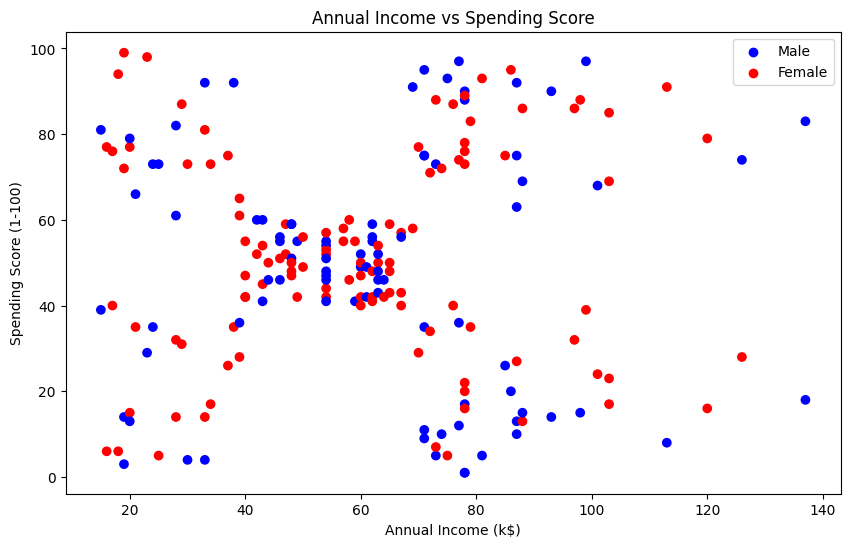

In [12]:
plt.figure(figsize=(10, 6))

# Create a color mapping dictionary for Gender
colors = {'Male': 'blue', 'Female': 'red'}
# Map the 'Gender' column to colors
c = df['Gender'].map(colors)

plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=c)  # Use 'c' for color

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score')

# Add a legend to explain the colors
plt.legend(handles=[plt.scatter([], [], color=colors[g], label=g) for g in colors], loc='best')
plt.show()

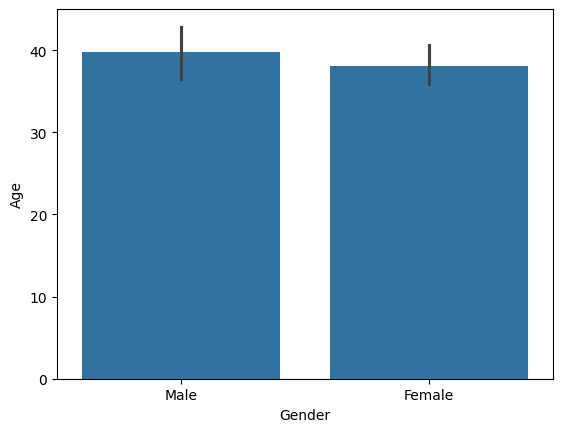

In [13]:
sns.barplot(x=df['Gender'], y=df['Age']) # Use sns.barplot instead of sns.bar
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

In [14]:
df['Gender'].value_counts()

,count
Gender,
Female,112
Male,88


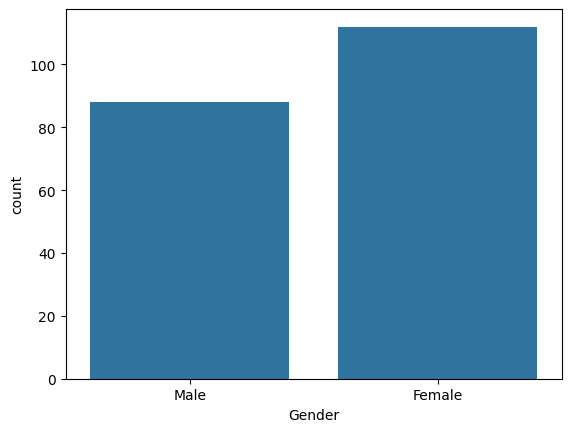

In [15]:
sns.countplot(x=df['Gender']) # Use sns.barplot instead of sns.bar
plt.xlabel('Gender')
plt.ylabel('count')
plt.show()

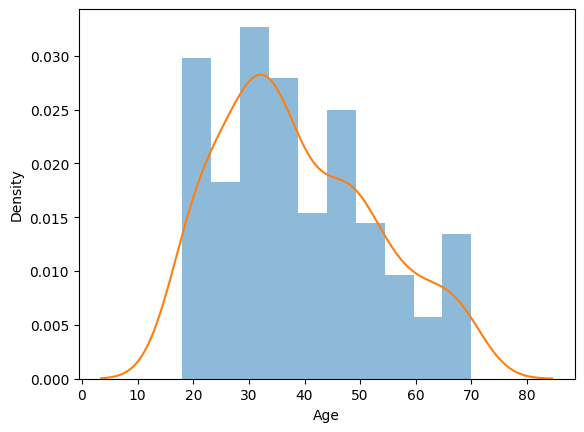

In [16]:
plt.hist(df['Age'], bins=10, density=True, alpha=0.5)  # Plot histogram
sns.kdeplot(df['Age'])  # Plot KDE
plt.xlabel('Age')
plt.show()

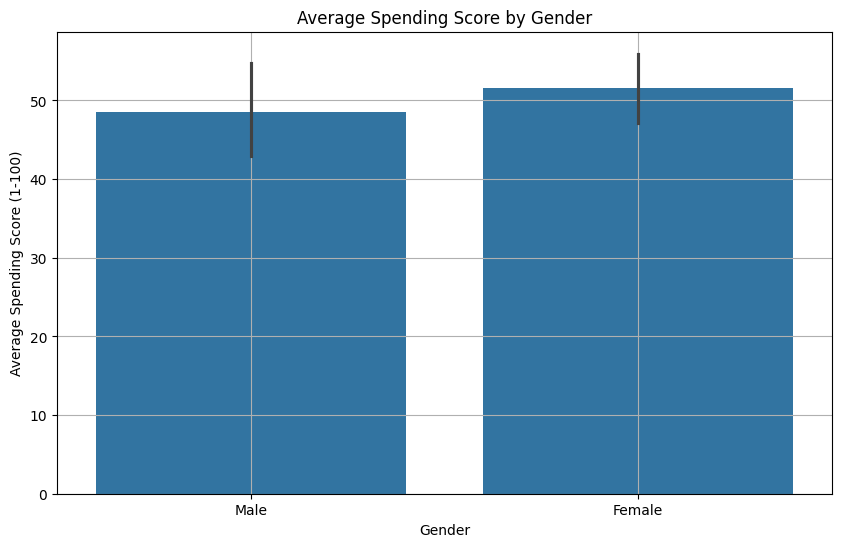

In [17]:
plt.figure(figsize=[10,6])
sns.barplot(x='Gender', y='Spending Score (1-100)', data=df)
plt.xlabel('Gender')
plt.ylabel('Average Spending Score (1-100)')
plt.title('Average Spending Score by Gender')
plt.grid()
plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [19]:
df.Gender.unique()

array([1, 0])

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Age', 'Annual Income (k$)']] = scaler.fit_transform(df[['Age', 'Annual Income (k$)']])
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0.019231,0.000000,39
1,1,0.057692,0.000000,81
2,0,0.038462,0.008197,6
3,0,0.096154,0.008197,77
4,0,0.250000,0.016393,40


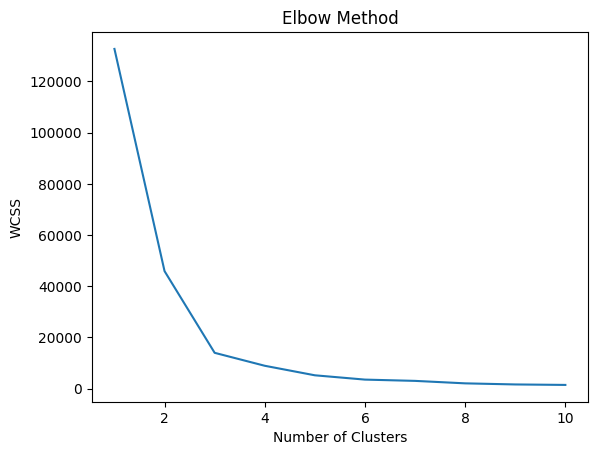

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df.drop(['Gender'], axis=1))  # Exclude only 'Gender' as 'clusters' is not yet created
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3, random_state=42)
df['clusters'] = kmeans.fit_predict(df.drop('Gender', axis=1))


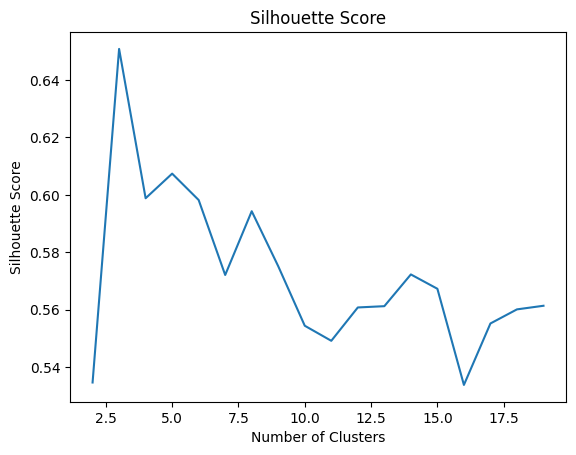

In [23]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 20):  # Silhouette score requires at least 2 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(df.drop(['Gender', 'clusters'], axis=1))
    silhouette_scores.append(silhouette_score(df.drop(['Gender', 'clusters'], axis=1), labels))

plt.plot(range(2, 20), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

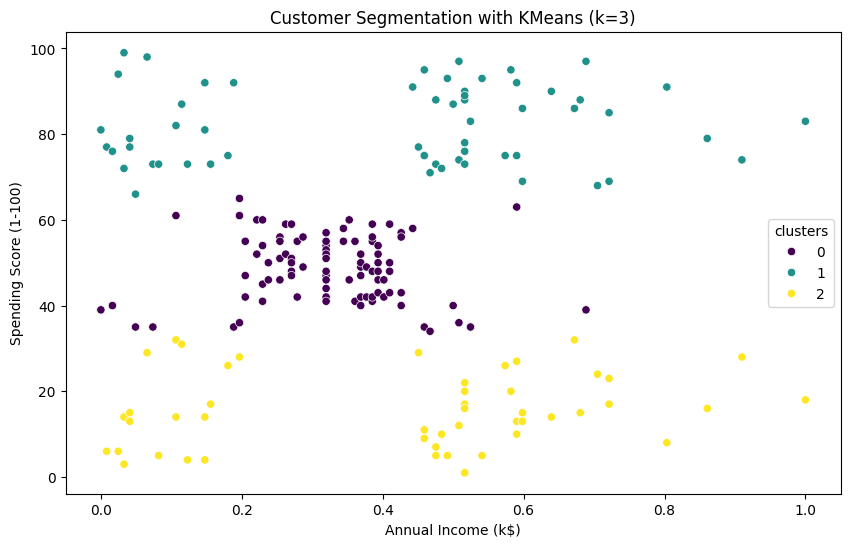

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Assuming k=5 is optimal
kmeans = KMeans(n_clusters=3, random_state=42)
df['clusters'] = kmeans.fit_predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='clusters', data=df, palette='viridis')
plt.title('Customer Segmentation with KMeans (k=3)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [25]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]  # Features used for clustering
labels = df['clusters']  # Cluster assignments
silhouette_avg = silhouette_score(X, labels)

print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6514974492639977


In [26]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,0.019231,0.000000,39,0
1,1,0.057692,0.000000,81,1
2,0,0.038462,0.008197,6,2
3,0,0.096154,0.008197,77,1
4,0,0.250000,0.016393,40,0


In [27]:
from sklearn.metrics import adjusted_rand_score

# Create a reference clustering based on Spending Score (example)
df['reference_clusters'] = pd.qcut(df['Spending Score (1-100)'], 3, labels=[0, 1, 2])  # 3 quantiles

# Calculate ARI
ari = adjusted_rand_score(df['reference_clusters'], df['clusters'])
print(f"Adjusted Rand Index: {ari}")

Adjusted Rand Index: 0.6533819205496273


In [28]:
from sklearn.metrics import silhouette_score
import pandas as pd

# Calculate silhouette score
X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]  # Features used for clustering
labels = df['clusters']  # Cluster assignments
silhouette_avg = silhouette_score(X, labels)

print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6490805522854499


In [29]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming 'kmeans' is your trained KMeans model and 'scaler' is the MinMaxScaler object
# used for scaling the training data

def predict_cluster():
    # Get user input for features
    gender = int(input("Enter Gender (1 for Male, 0 for Female): "))
    age = float(input("Enter Age: "))
    annual_income = float(input("Enter Annual Income (k$): "))
    spending_score = float(input("Enter Spending Score (1-100): "))

    # Create a DataFrame with user input
    user_data = pd.DataFrame({'Gender': [gender], 'Age': [age], 'Annual Income (k$)': [annual_income], 'Spending Score (1-100)': [spending_score]})

    # Scale the relevant features using the pre-fitted scaler
    user_data[['Age', 'Annual Income (k$)']] = scaler.transform(user_data[['Age', 'Annual Income (k$)']])

    # Predict the cluster
    predicted_cluster = kmeans.predict(user_data[['Annual Income (k$)', 'Spending Score (1-100)']])  # Select relevant features

    print("Predicted Cluster:", predicted_cluster[0])

# Call the function to start the prediction process
predict_cluster()

Enter Gender (1 for Male, 0 for Female): 1
Enter Age: 22
Enter Annual Income (k$): 39
Enter Spending Score (1-100): 111
Predicted Cluster: 1


In [34]:
import pickle

# Replace 'model' with 'kmeans' to save the trained KMeans model
pickle.dump(kmeans, open('customer_segmentation.pkl', 'wb'))

In [35]:
!pip install streamlit==1.28.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.6/207.6 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 90.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 93.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0
  Attempting uninstall: pillow
    Found existing installation: pillow 11.1.0
    Uninstalling pillow-11.1.0:
      Successfully uninsta

In [10]:
import streamlit as st
import pickle
import pandas as pd

# Load the model
with open('customer_segmentation.pkl', 'rb') as file: # Changed filename
    loaded_model = pickle.load(file)

# Streamlit app title
st.title("Food Popularity Prediction")

# Input fields for features
Cooking_Time_Minutes = st.number_input("Enter Cooking Time in Minutes:", min_value=0.0)
Serving_Size = st.number_input("Enter Serving Size:", min_value=0.0)
Calories_Per_Serving = st.number_input("Enter Calories Per Serving:", min_value=0.0)
Cost_Per_Serving = st.number_input("Enter Cost Per Serving:", min_value=0.0)
Num_Ingredients = st.number_input("Enter Number of Ingredients:", min_value=0.0)

# Create a DataFrame with the user input
user_input = pd.DataFrame({
    'Cooking_Time_Minutes': [Cooking_Time_Minutes],
    'Serving_Size': [Serving_Size],
    'Calories_Per_Serving': [Calories_Per_Serving],
    'Cost_Per_Serving': [Cost_Per_Serving],
    'Num_Ingredients': [Num_Ingredients]
})

# Make prediction when the button is clicked
if st.button("Predict Popularity"):
    prediction = loaded_model.predict(user_input)
    st.success(f"Predicted Popularity Score: {prediction[0]}")

In [11]:
!wget -q -O - ipv4.icanhazip.com

35.232.126.21


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

⠙⠹⠸⠼⠴⠦Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py
⠧⠇your url is: https://major-seas-send.loca.lt
